# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

---

The data represents 17 marketing campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

---

In [204]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Looking at Datatypes

First, let's convert the column 'y' into 1 for 'Yes' and 0 for 'No', since ML algorithms can only handle numerical values

In [12]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

Now, after looking at the original datatypes below, let's coerce some of them into a more specific datatype

In [14]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [15]:
df = df.convert_dtypes()

In [16]:
df.dtypes

age                        Int64
job               string[python]
marital           string[python]
education         string[python]
default           string[python]
housing           string[python]
loan              string[python]
contact           string[python]
month             string[python]
day_of_week       string[python]
duration                   Int64
campaign                   Int64
pdays                      Int64
previous                   Int64
poutcome          string[python]
emp.var.rate             Float64
cons.price.idx           Float64
cons.conf.idx            Float64
euribor3m                Float64
nr.employed              Float64
y                          Int64
dtype: object

#### Checking for Missing Values

There are no missing values as shown below.

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

---

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

The business objective is to understand what factors contribute to customers subscribing to long-term deposits at this Portuguese bank. By understanding these factors, the bank can then modify their marketing strategy to increase their efficiency in getting customer subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

---

Let's make sure to standard scale all the numerical features, and one hot encode all the categorical features.

Also, let's drop the column duration due to the reason in the description: 

> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [26]:
X = df.drop(columns=['y', 'duration'])

In [27]:
y = df['y']

In [28]:
numerical_features = X.select_dtypes(include=['int', 'float']).columns
numerical_features

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [29]:
categorical_features = X.select_dtypes(include=['string']).columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [214]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

col_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numerical_features)
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

---

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

---

We'll compare to a simple model that will always predict the most frequent class label in the dataset

In [169]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
dummy_clf = DummyClassifier(strategy="most_frequent")
start_time = time.time()
dummy_clf.fit(X_train, y_train)
train_time = time.time() - start_time

train_accuracy = dummy_clf.score(X_train, y_train)

test_preds = pipe.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_preds)

In [171]:
row = [
    'Baseline: Most Frequent Class',
    train_time,
    train_accuracy,
    test_accuracy,
    precision,
    recall,
    f1,
    roc_auc
]
baseline_performance_df = pd.DataFrame(
    [row], 
    columns=[
        'Model', 
        'Train Time', 
        'Train Accuracy', 
        'Test Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'ROC AUC Score']
)
baseline_performance_df

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Baseline: Most Frequent Class,0.004918,0.887344,0.903496,0.695015,0.255388,0.373522,0.62058


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [41]:
logistic = LogisticRegression()

In [42]:
pipe = Pipeline([
    ('col_transformer', col_transformer),
    ('logistic', logistic)
])

In [43]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('logistic', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [45]:
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
print(f"Training accuracy: {train_score}")
print(f"Test accuracy: {test_score}")

Training accuracy: 0.8999089529590288
Test accuracy: 0.9009468317552805


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
import numpy as np

In [48]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

In [49]:
results = []

for name, model in models:
    pipe = Pipeline([
        ('col_transformer', col_transformer),
        ('model', model)
    ])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = pipe.score(X_train, y_train)

    test_preds = pipe.predict(X_test)

    test_accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    roc_auc = roc_auc_score(y_test, test_preds)

    results.append([name, train_time, train_accuracy, test_accuracy, precision, recall, f1, roc_auc, pipe])

In [50]:
comparison_df = pd.DataFrame(
    results, 
    columns=[
        'Model', 
        'Train Time', 
        'Train Accuracy', 
        'Test Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'ROC AUC Score', 
        'Pipe']
)
comparison_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.390061,0.899909,0.900947,0.690476,0.218750,0.332242,0.603151
1,KNN,0.086729,0.912231,0.897184,0.583851,0.303879,0.399717,0.638191
2,Decision Tree,0.229367,0.995417,0.837703,0.296517,0.321121,0.308329,0.612202
3,SVM,58.118473,0.904977,0.903496,0.695015,0.255388,0.373522,0.620580


In [51]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

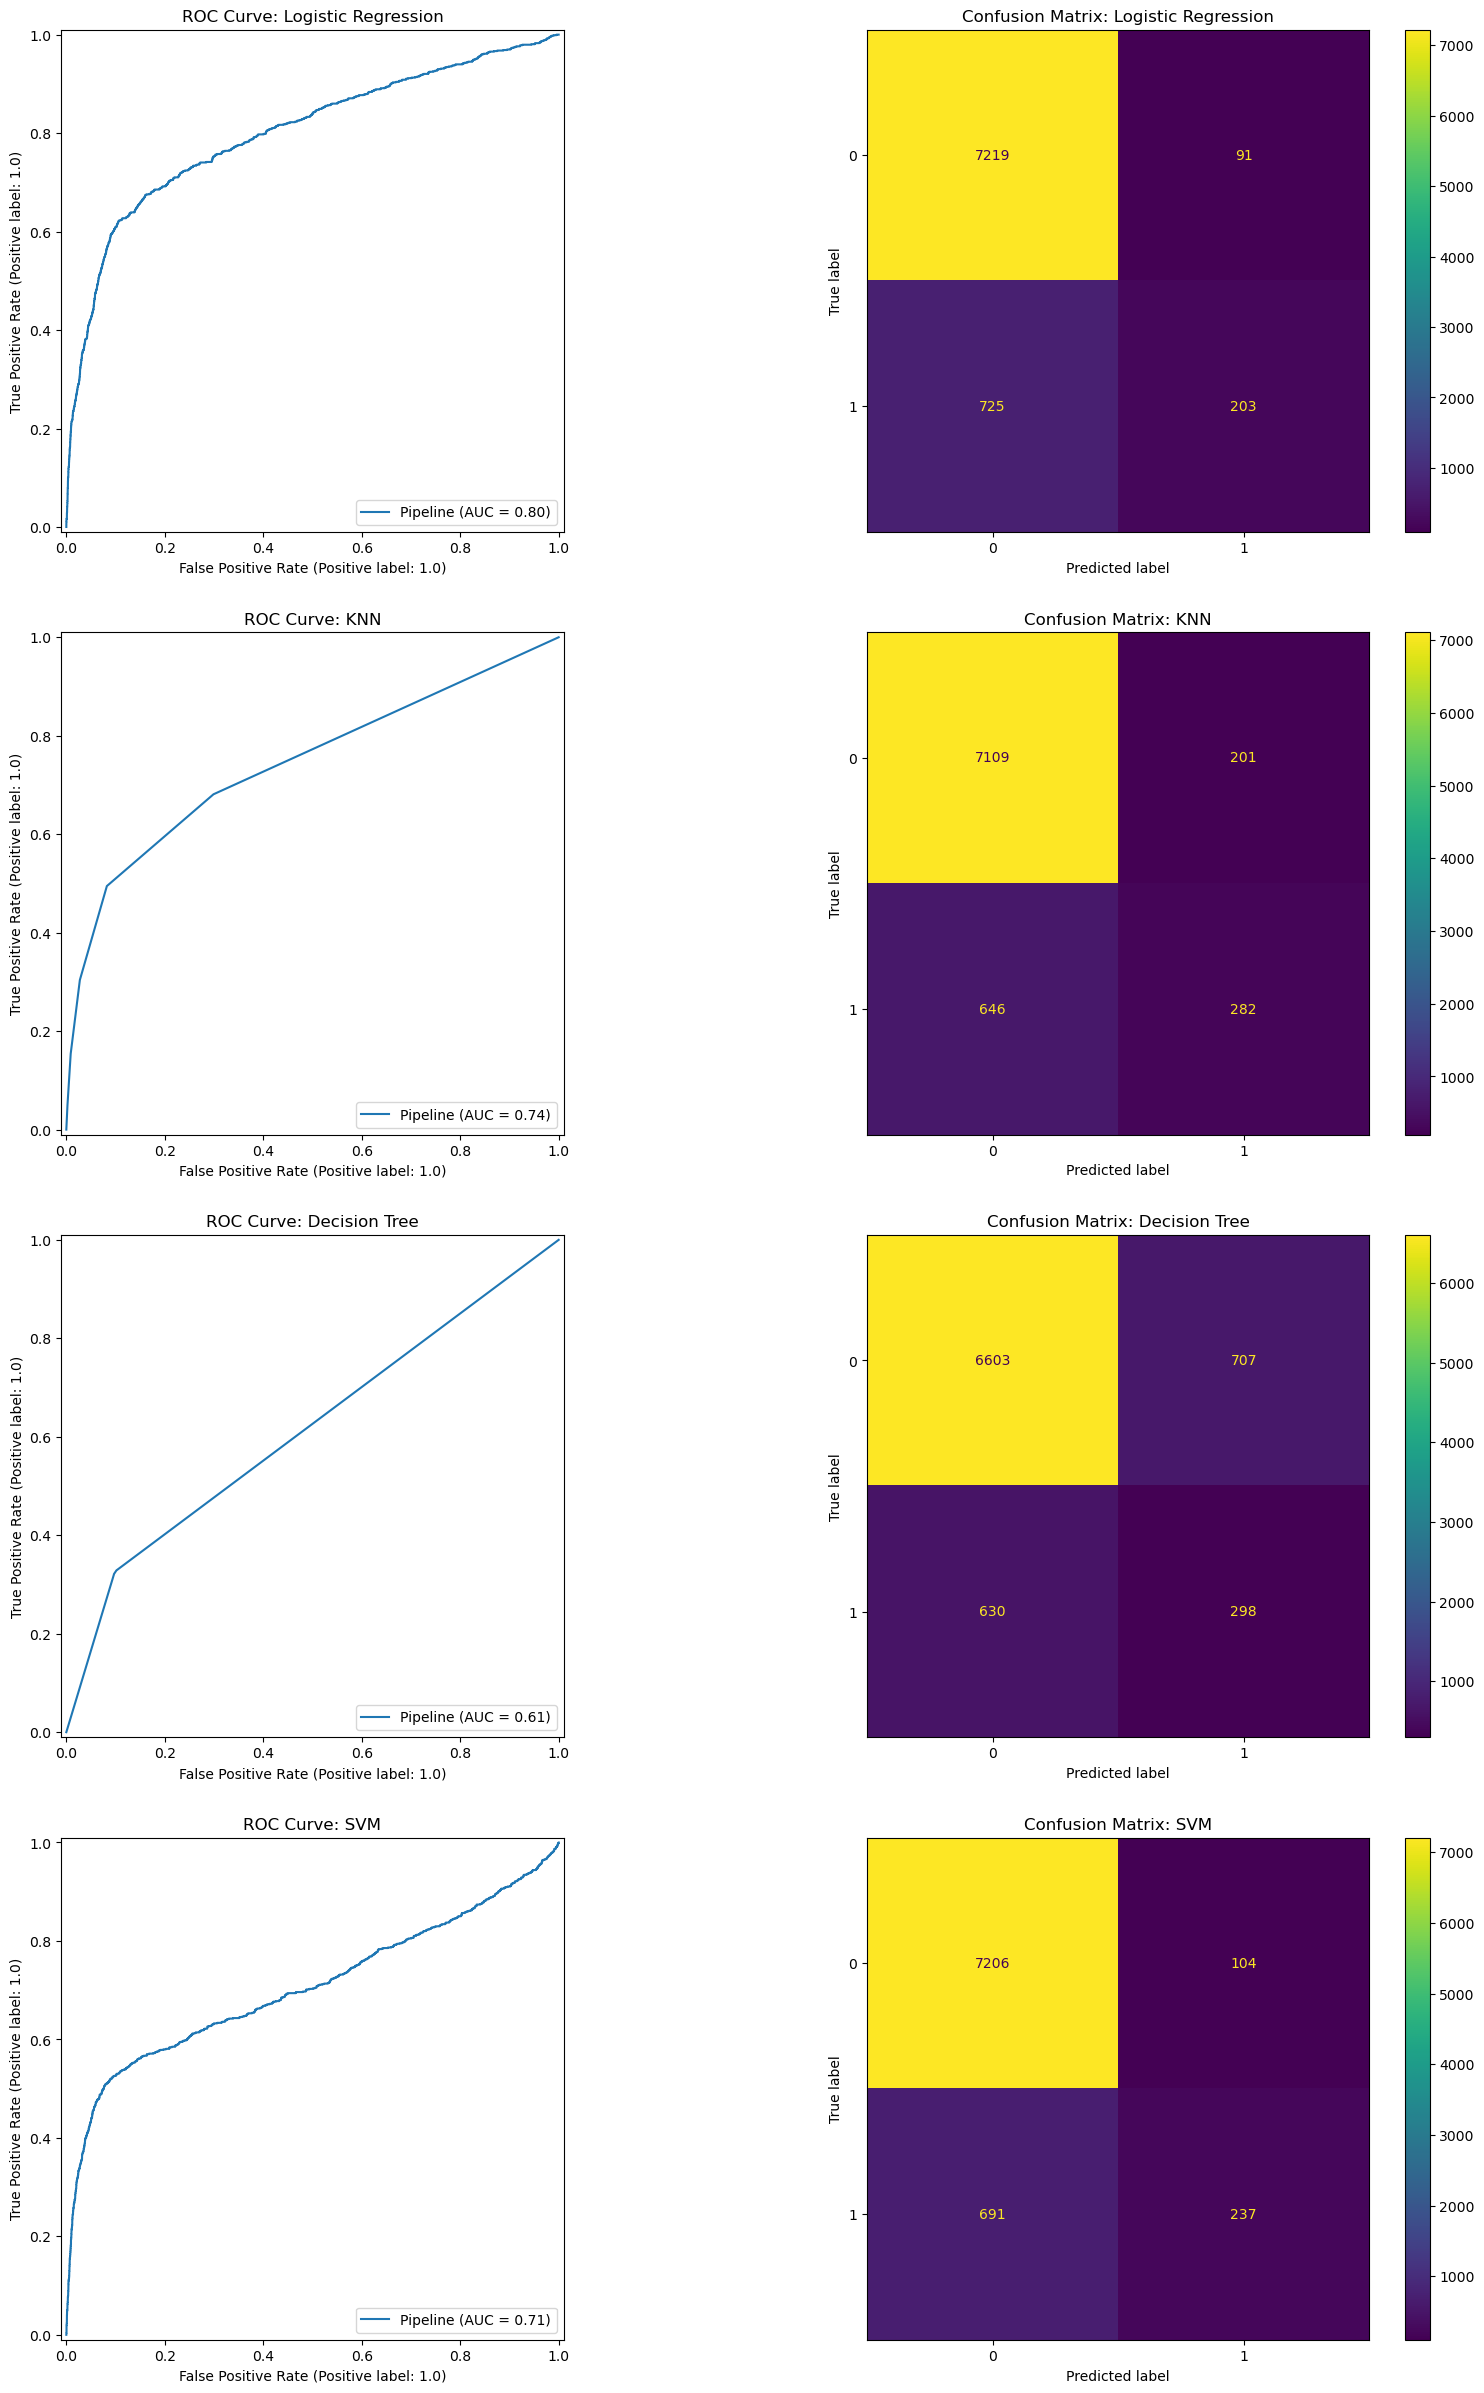

In [52]:
fig, axes = plt.subplots(nrows=len(comparison_df), ncols=2, figsize=((20, 30)))
axes = axes.flatten()

for i, row in comparison_df.iterrows():
    model_name = row['Model']
    pipe = row['Pipe']

    roc_axis = axes[2*i]
    roc_display = RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax=roc_axis)
    roc_display.ax_.set_title(f"ROC Curve: {model_name}")

    cm_axis = axes[2*i + 1]
    cm = ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax=cm_axis)
    cm.ax_.set_title(f"Confusion Matrix: {model_name}")

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Let's try different hyperparameters and using a different scoring method with GridSearchCV by optimizing for either 'F1 Score', 'ROC AUC Score', or 'Accuracy'.

In [55]:
comparison_columns = [
    'Model', 
    'Train Time', 
    'Train Accuracy', 
    'Test Accuracy', 
    'Precision', 
    'Recall', 
    'F1 Score',
    'ROC AUC Score', 
    'Grid Search Scoring',
    'Best Params', 
    'Pipe',
]
pd.set_option('display.max_colwidth', None)

In [216]:
def get_model_results(model_name, model, param_grid, scoring, cv=5):
    pipe = Pipeline([
        ('col_transformer', col_transformer),
        ('model', model),
    ])
    cv = GridSearchCV(
        pipe,
        param_grid,
        scoring=scoring,
        cv=cv,
    )
    cv.fit(X_train, y_train)
    
    best_params = cv.best_params_
    fit_time = np.mean(cv.cv_results_['mean_fit_time'])

    best_model = cv.best_estimator_
    train_accuracy = best_model.score(X_train, y_train)

    test_preds = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    roc_auc = roc_auc_score(y_test, test_preds)

    row = [
        model_name, 
        fit_time, 
        train_accuracy, 
        test_accuracy, 
        precision,
        recall,
        f1,
        roc_auc,
        scoring,
        best_params, 
        best_model
    ]
    return pd.DataFrame([row], columns=comparison_columns)

### Logistic Regression

In [58]:
logistic_param_grid = {
    'model__C': [5.0, 1.0, 0.5, 0.1],
    'model__solver': ['liblinear', 'lbfgs'],
}

In [206]:
logistic_f1_df = get_model_results('Logistic Regression', LogisticRegression(), logistic_param_grid, 'f1')

In [208]:
logistic_f1_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Logistic Regression,0.262862,0.899788,0.90119,0.69,0.22306,0.337134,0.605169,f1,"{'model__C': 5.0, 'model__solver': 'liblinear'}"


In [61]:
logistic_roc_auc_df = get_model_results('Logistic Regression', LogisticRegression(), logistic_param_grid, 'roc_auc')

In [62]:
logistic_roc_auc_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Logistic Regression,0.268788,0.900243,0.901918,0.705479,0.221983,0.337705,0.605109,roc_auc,"{'model__C': 0.1, 'model__solver': 'liblinear'}"


In [63]:
logistic_accuracy_df = get_model_results('Logistic Regression', LogisticRegression(), logistic_param_grid, 'accuracy')

In [64]:
logistic_accuracy_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Logistic Regression,0.262755,0.900182,0.902282,0.705686,0.227371,0.343928,0.607666,accuracy,"{'model__C': 0.1, 'model__solver': 'lbfgs'}"


### Decision Tree

In [66]:
dtree_param_grid = {
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': [5, 10, 15, 20],
    'model__min_impurity_decrease': [0, 0.05, 0.1],
    'model__ccp_alpha': [0, 0.5, 1],
}

In [67]:
dtree_f1_df = get_model_results('Decision Tree', DecisionTreeClassifier(), dtree_param_grid, 'f1')

In [68]:
dtree_f1_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Decision Tree,0.08832,0.918331,0.901068,0.632941,0.289871,0.397635,0.634265,f1,"{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_impurity_decrease': 0}"


In [69]:
dtree_roc_auc_df = get_model_results('Decision Tree', DecisionTreeClassifier(), dtree_param_grid, 'roc_auc')

In [70]:
dtree_roc_auc_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Decision Tree,0.087329,0.902853,0.902525,0.68546,0.248922,0.365217,0.617211,roc_auc,"{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_impurity_decrease': 0}"


### KNN

In [72]:
knn_param_grid = {
    'model__n_neighbors': [5, 10, 15, 20],
    'model__weights': ['uniform', 'distance'],
}

In [73]:
knn_f1_df = get_model_results('KNN', KNeighborsClassifier(), knn_param_grid, 'f1')

In [74]:
knn_f1_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,KNN,0.051928,0.912231,0.897184,0.583851,0.303879,0.399717,0.638191,f1,"{'model__n_neighbors': 5, 'model__weights': 'uniform'}"


In [75]:
knn_roc_auc_df = get_model_results('KNN', KNeighborsClassifier(), knn_param_grid, 'roc_auc')

In [76]:
knn_roc_auc_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,KNN,0.052762,0.90258,0.901554,0.694352,0.225216,0.340114,0.606315,roc_auc,"{'model__n_neighbors': 20, 'model__weights': 'uniform'}"


### SVM

In [220]:
svc_param_grid = {
    'model__C': [0.1, 1, 10]
}

In [222]:
# SVM takes a very long time to train
# So, reducing the CV to 2 so we can try more model types without taking too much time and compute power
svm_f1_df = get_model_results('SVM', SVC(), svc_param_grid, 'f1', cv=2)

In [224]:
svm_f1_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,SVM,5.427791,0.927193,0.900097,0.628362,0.27694,0.384443,0.628073,f1,{'model__C': 10}


In [226]:
param_and_scoring_comparison_df = pd.concat(
    [
        logistic_f1_df,
        logistic_roc_auc_df,
        logistic_accuracy_df,
        dtree_f1_df,
        dtree_roc_auc_df,
        knn_f1_df,
        knn_roc_auc_df,
        svm_f1_df,
    ], 
    ignore_index=True, 
    axis=0
)

In [228]:
param_and_scoring_comparison_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Grid Search Scoring,Best Params
0,Logistic Regression,0.262862,0.899788,0.901190,0.690000,0.223060,0.337134,0.605169,f1,"{'model__C': 5.0, 'model__solver': 'liblinear'}"
1,Logistic Regression,0.268788,0.900243,0.901918,0.705479,0.221983,0.337705,0.605109,roc_auc,"{'model__C': 0.1, 'model__solver': 'liblinear'}"
2,Logistic Regression,0.262755,0.900182,0.902282,0.705686,0.227371,0.343928,0.607666,accuracy,"{'model__C': 0.1, 'model__solver': 'lbfgs'}"
3,Decision Tree,0.088320,0.918331,0.901068,0.632941,0.289871,0.397635,0.634265,f1,"{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_impurity_decrease': 0}"
4,Decision Tree,0.087329,0.902853,0.902525,0.685460,0.248922,0.365217,0.617211,roc_auc,"{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_impurity_decrease': 0}"
5,KNN,0.051928,0.912231,0.897184,0.583851,0.303879,0.399717,0.638191,f1,"{'model__n_neighbors': 5, 'model__weights': 'uniform'}"
6,KNN,0.052762,0.902580,0.901554,0.694352,0.225216,0.340114,0.606315,roc_auc,"{'model__n_neighbors': 20, 'model__weights': 'uniform'}"
7,SVM,5.427791,0.927193,0.900097,0.628362,0.276940,0.384443,0.628073,f1,{'model__C': 10}


Let's compare the tuned hyperparameter table above to the table with the default hyperparameters

In [234]:
comparison_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.390061,0.899909,0.900947,0.690476,0.218750,0.332242,0.603151
1,KNN,0.086729,0.912231,0.897184,0.583851,0.303879,0.399717,0.638191
2,Decision Tree,0.229367,0.995417,0.837703,0.296517,0.321121,0.308329,0.612202
3,SVM,58.118473,0.904977,0.903496,0.695015,0.255388,0.373522,0.620580


### Numerical Feature Exploration

Let's take a look at the boxplots of the various numerical features to see their distribution.

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

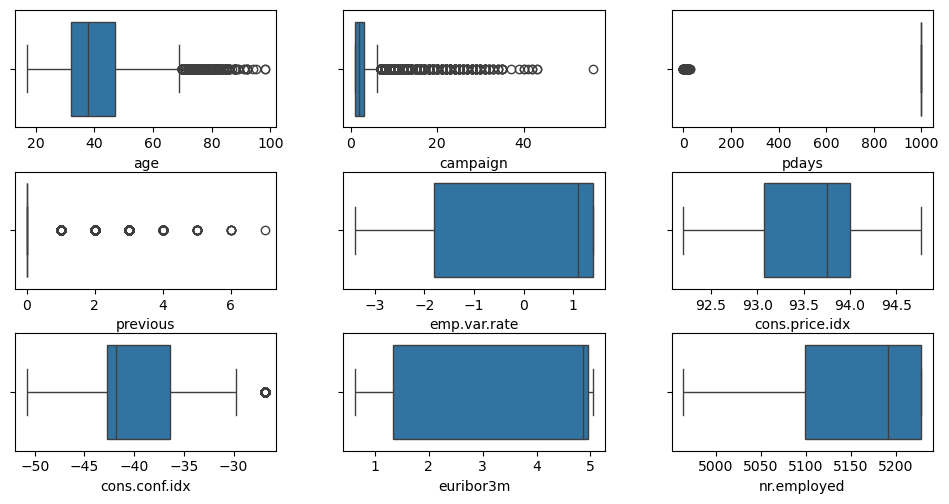

In [238]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
axes = axes.flatten()
plt.tight_layout()

for i, col in enumerate(numerical_features):
    sns.boxplot(data=df, x=col, ax=axes[i])

Feature to be removed: pdays

Looking at the box plots, it looks like pdays (number of days that passed by after the client was last contacted), is not a very useful feature to have since only 3.6% of values have a meaningful pday value. You can see this calculation below (999 means the client was not previously contacted).

In [241]:
sum(df['pdays'] != 999) / len(df)

0.036782558026609694

Now, let's look at the correlation matrix to see if any features are highly correlated with each other.

In [244]:
correlation_df = df.corr(numeric_only=True)
correlation_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [246]:
correlation_df[correlation_df > 0.8]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.972245,0.906970,NaN
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154,NaN
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000,NaN


Features to be removed: nr.employed, emp.var.rate

We can see that euribor3m, nr.employed, and emp.var.rate all have high correlation with each other - all 0.9 and above. Thus, they likely have similar influence on the predictor output (whether a customer will subscribe to the long-term deposit), so we can remove 2 of the features and keep 1 to try to reduce the dimesionality of the dataset for faster training purposes. 

Now, how do we decide which feature of the three to keep? Let's keep euribor3m because it is related to bank lending practices (From global-rates.com, "The 3-month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months.") These lending practices would more directly influence the bank's offerings for their long-term deposit rate, which in turn would likely influence whether clients subscribe to these deposits. 

### Categorical Feature Exploration

Let's take a look at the histograms of the various categorical features to see their distribution.

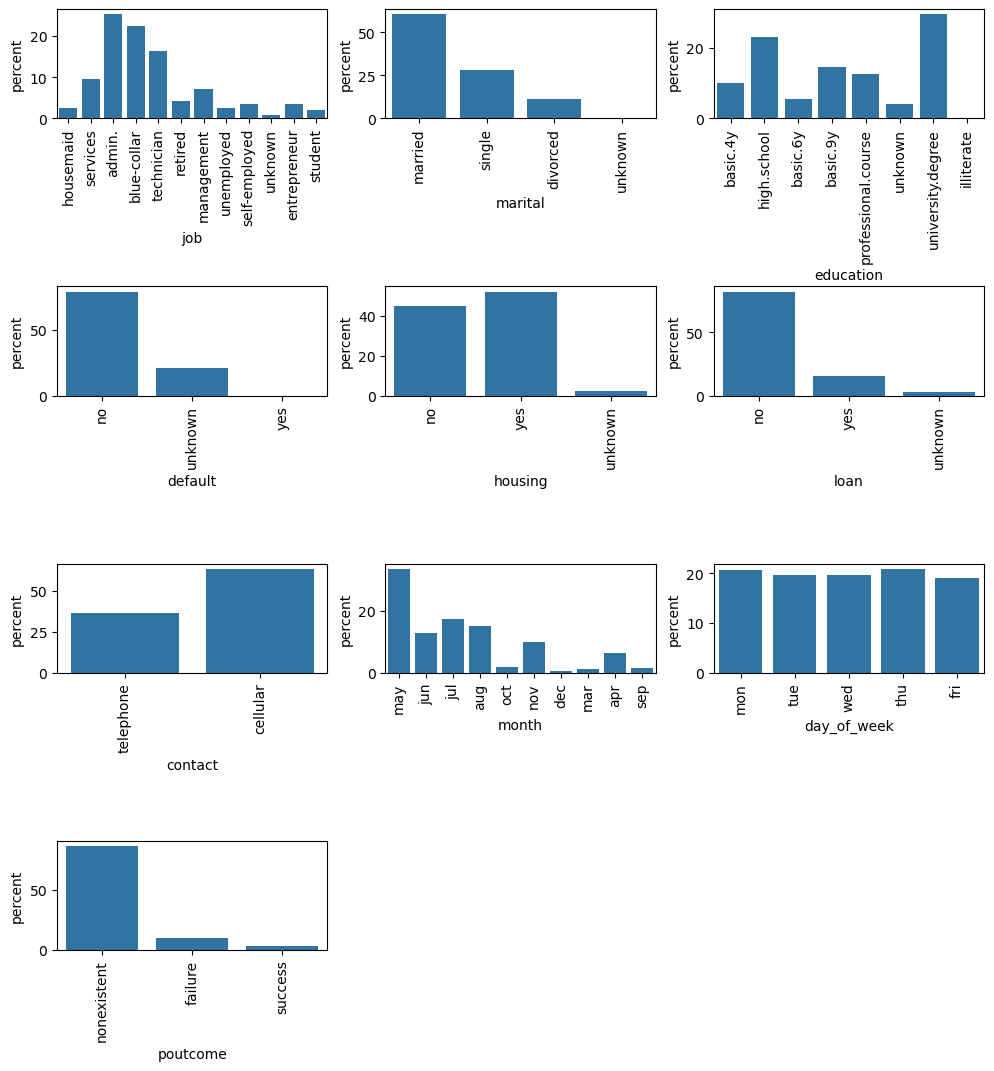

In [250]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flatten()
plt.tight_layout(h_pad=10.0)

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], stat='percent')
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

It looks like for every categorical feature, there isn't more than 90% of the data in one category within the feature. So, there's enough data in other categories to warrant keeping the feature.

Now, let's look at the percentages of y = 1 or y = 0 for each category within a feature.

In [254]:
from IPython.display import display

In [256]:
for col in categorical_features:
    category_counts = df.groupby(col)['y'].value_counts(normalize=True).unstack() * 100
    display(category_counts)

y,0,1
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.0,10.0
management,88.78249,11.21751
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.86193,8.13807
student,68.571429,31.428571


y,0,1
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.0,15.0


y,0,1
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


y,0,1
default,,
no,87.121026,12.878974
unknown,94.84704,5.15296
yes,100.0,<NA>


y,0,1
housing,,
no,89.120395,10.879605
unknown,89.191919,10.808081
yes,88.380608,11.619392


y,0,1
loan,,
no,88.659794,11.340206
unknown,89.191919,10.808081
yes,89.068502,10.931498


y,0,1
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


y,0,1
month,,
apr,79.521277,20.478723
aug,89.397863,10.602137
dec,51.098901,48.901099
jul,90.953443,9.046557
jun,89.48853,10.51147
mar,49.450549,50.549451
may,93.565255,6.434745
nov,89.856133,10.143867
oct,56.128134,43.871866


y,0,1
day_of_week,,
fri,89.191261,10.808739
mon,90.05168,9.94832
thu,87.881248,12.118752
tue,88.220025,11.779975
wed,88.332924,11.667076


y,0,1
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


For the following 3 features 'Housing', 'Loan', and 'Day of Week', the percentage of 'y' = 1 for each category end up being around 10.8%, 11%, and 10% respectively. These features could potentially be considered for removal, since by their individual isolated values, the differences in the categories don't yield a substantial difference in the output predictor. However, they could still be kept in case a combination of their features with another feature has some significant effect on the predictor output. For testing purposes, let's drop these features and re-run some of the models to see the effect.

In summary, let's try dropping the following columns
* nr.employed
* emp.var.rate
* housing
* loan
* day_of_week

In [285]:
X_filtered = X.drop(columns=['nr.employed', 'emp.var.rate', 'housing', 'loan', 'day_of_week'])

In [287]:
numerical_features_filtered = X_filtered.select_dtypes(include=['int', 'float']).columns
categorical_features_filtered = X_filtered.select_dtypes(include=['string']).columns

In [289]:
col_transformer_filtered = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features_filtered),
    (StandardScaler(), numerical_features_filtered)
)

In [279]:
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y) 

In [297]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC())
]

In [299]:
pipe_filtered = Pipeline([
    ('col_transformer', col_transformer_filtered),
    ('model', model),
])

In [303]:
results = []
for name, model in models:
    pipe_filtered = Pipeline([
        ('col_transformer', col_transformer_filtered),
        ('model', model),
    ])
    start_time = time.time()
    pipe_filtered.fit(X_train_filtered, y_train_filtered)
    train_time = time.time() - start_time

    train_accuracy = pipe_filtered.score(X_train_filtered, y_train_filtered)

    test_preds = pipe_filtered.predict(X_test_filtered)

    test_accuracy = accuracy_score(y_test_filtered, test_preds)
    precision = precision_score(y_test_filtered, test_preds)
    recall = recall_score(y_test_filtered, test_preds)
    f1 = f1_score(y_test_filtered, test_preds)
    roc_auc = roc_auc_score(y_test_filtered, test_preds)

    results.append([name, train_time, train_accuracy, test_accuracy, precision, recall, f1, roc_auc, pipe])

In [305]:
comparison_df_filtered = pd.DataFrame(
    results, 
    columns=[
        'Model', 
        'Train Time', 
        'Train Accuracy', 
        'Test Accuracy', 
        'Precision', 
        'Recall', 
        'F1 Score',
        'ROC AUC Score', 
        'Pipe']
)
comparison_df_filtered.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.148722,0.899272,0.901311,0.696246,0.219828,0.334152,0.603826
1,KNN,0.087567,0.912747,0.893785,0.552268,0.301724,0.390244,0.635335
2,Decision Tree,0.746993,0.987102,0.850085,0.342564,0.359914,0.351025,0.636113
3,SVM,75.692995,0.903794,0.903617,0.690341,0.261853,0.379688,0.623471


Let's now compare it to when we trained with the default values on all the training data and features

In [309]:
comparison_df.drop(columns='Pipe')

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.390061,0.899909,0.900947,0.690476,0.218750,0.332242,0.603151
1,KNN,0.086729,0.912231,0.897184,0.583851,0.303879,0.399717,0.638191
2,Decision Tree,0.229367,0.995417,0.837703,0.296517,0.321121,0.308329,0.612202
3,SVM,58.118473,0.904977,0.903496,0.695015,0.255388,0.373522,0.620580


One thing to notice is the decision tree model suffered in metrics the most while the other models had similar metrics. And the SVM training time reduced significantly. So, it could be worth trying more feature reduction and hyperparameter tuning for the SVM to try to yield better results.